# Logistic regression

### Dataset: Thera Bank Personal Loan Campaign

- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any.
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Doesthe customer have a securities account with the bank?
- CD Account: Doesthe customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Doesthe customer use a credit card issued by the bank?

# Objective

The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Steps and Tasks

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

     - 2.1 Number of unique in each column?
     
     - 2.2 Number of people with zero mortgage?
     
     - 2.3 Number of people with zero credit card spending per month?
     
     - 2.4 Value counts of all categorical columns.
     
     - 2.5 Univariate and Bivariate
     
     - 2.6 Get data model ready
     
     
3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)
5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)
6. Give Business understanding of your model? (5 marks)

# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
dfBankData = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
#Check data type
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
#Check statistical Summary
dfBankData.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
dfBankData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
#Check shape
dfBankData.shape

(5000, 14)

In [7]:
#Check null values
dfBankData.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

# 2. EDA: Study the data distribution in each attribute and target variable.


- 2.1 Number of unique in each column?

In [8]:
#Number of unique in each column?
dfBankData.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

- 2.2 Number of people with zero mortgage?



In [9]:
#Number of people with zero mortgage?
dfBankData[dfBankData['Mortgage'] == 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,64,40,75,94588,3,2.0,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


- 2.3 Number of people with zero credit card spending per month?

In [71]:
#-Number of people with zero credit card spending per month?
dfBankData[dfBankData['CCAvg'] ==0 ]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
63,64,42,17.0,32,94523,4,0.0,2,0,0,0,0,1,0
128,129,38,14.0,74,92182,2,0.0,1,0,0,1,0,1,0
198,199,27,3.0,59,94123,4,0.0,1,90,0,1,0,1,0
210,211,51,26.0,20,92131,2,0.0,1,0,0,0,0,0,0
215,216,38,14.0,92,95818,2,0.0,1,249,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,4802,34,10.0,88,94404,2,0.0,1,121,0,0,0,1,0
4826,4827,56,31.0,81,93943,2,0.0,3,225,0,0,0,0,0
4837,4838,36,10.0,183,95348,2,0.0,1,0,0,0,0,0,0
4910,4911,48,22.0,120,90291,1,0.0,1,0,0,0,0,1,0


- 2.4 Value counts of all categorical columns.

In [11]:
dfBankData['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [12]:
dfBankData['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [13]:
dfBankData['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [14]:
dfBankData['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

- 2.5 Univariate and Bivariate

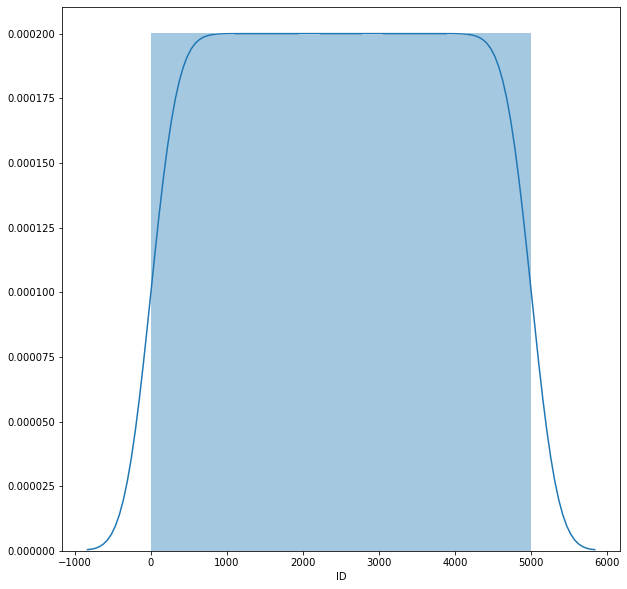

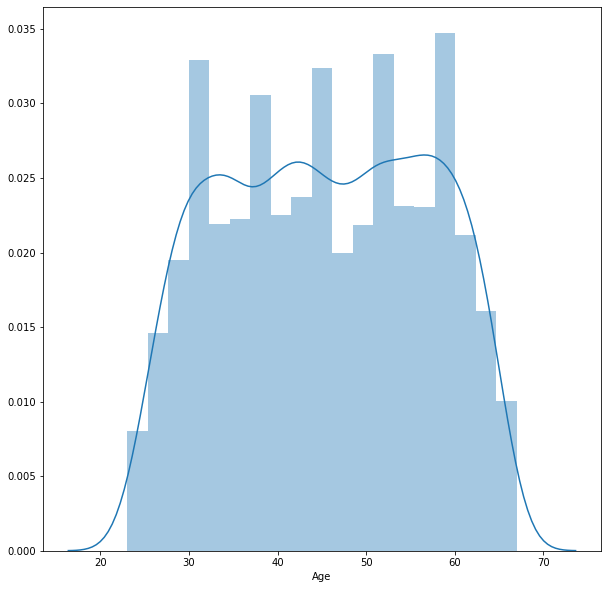

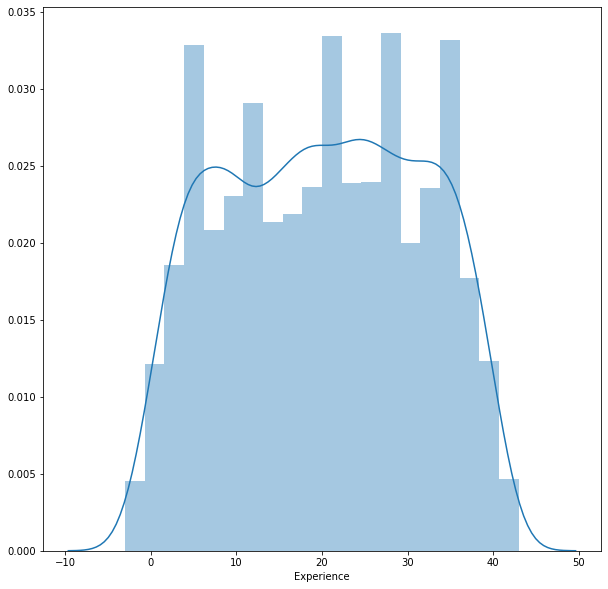

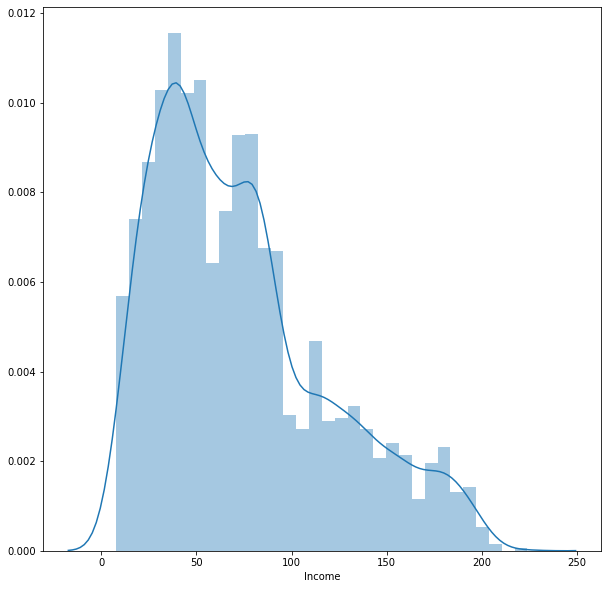

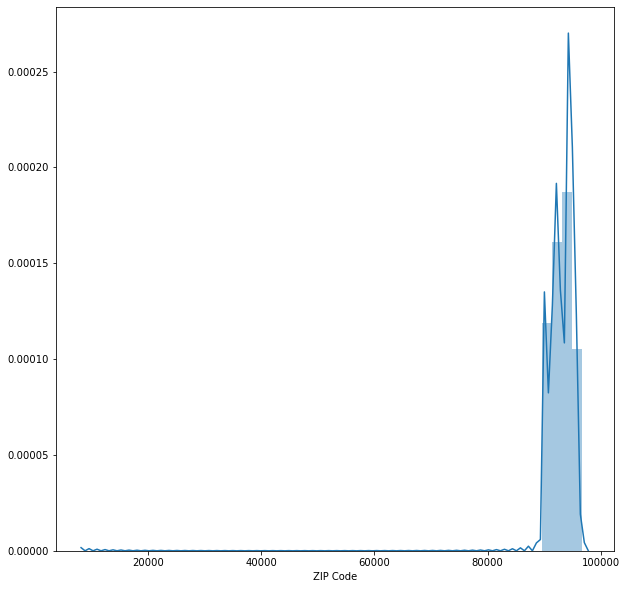

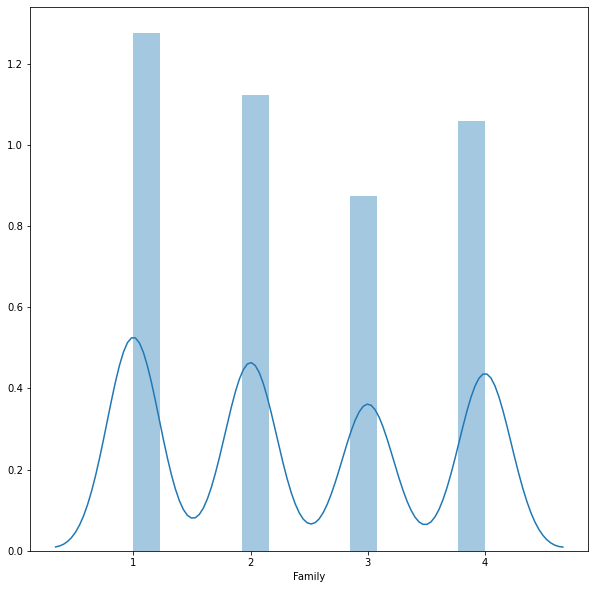

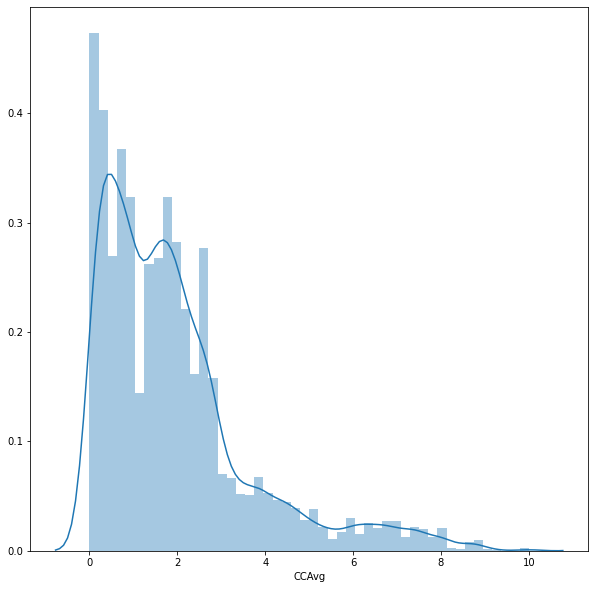

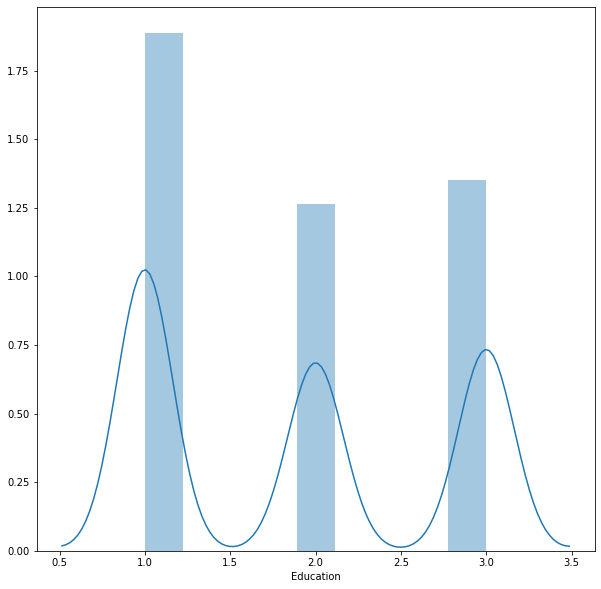

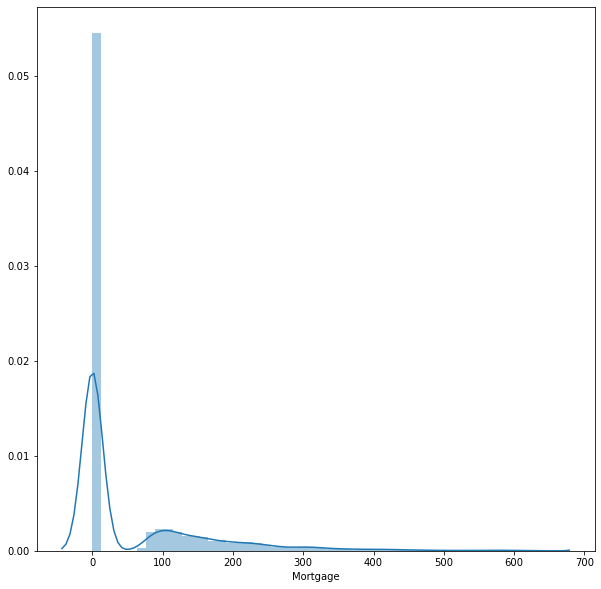

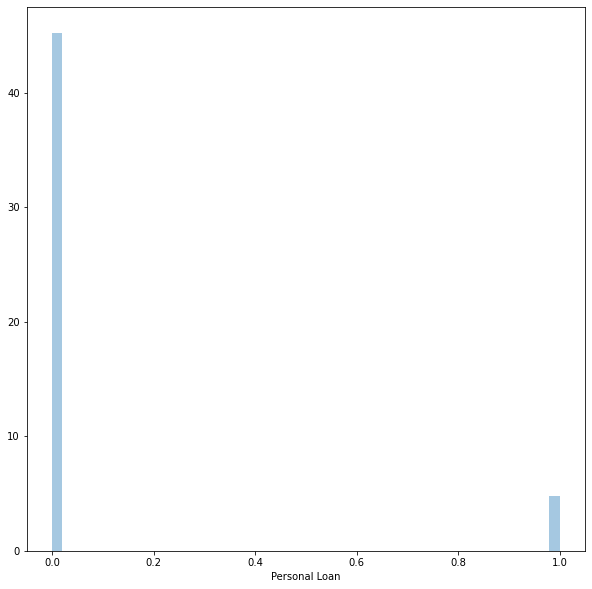

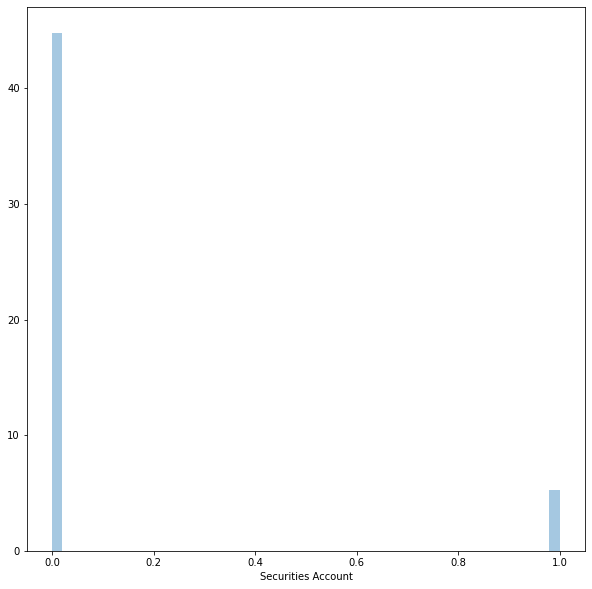

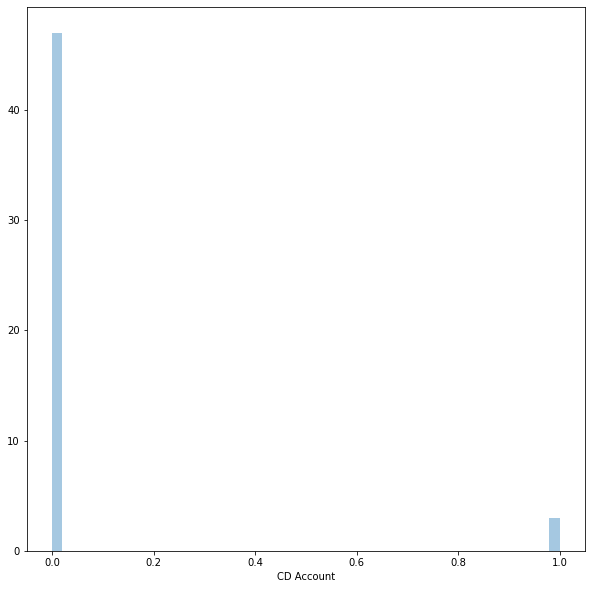

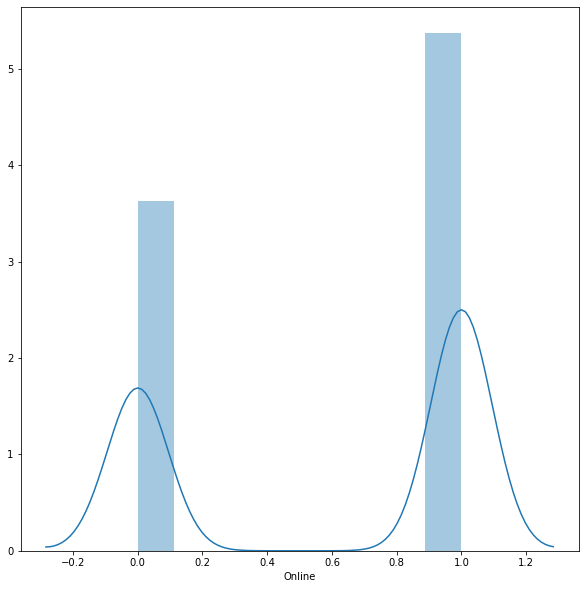

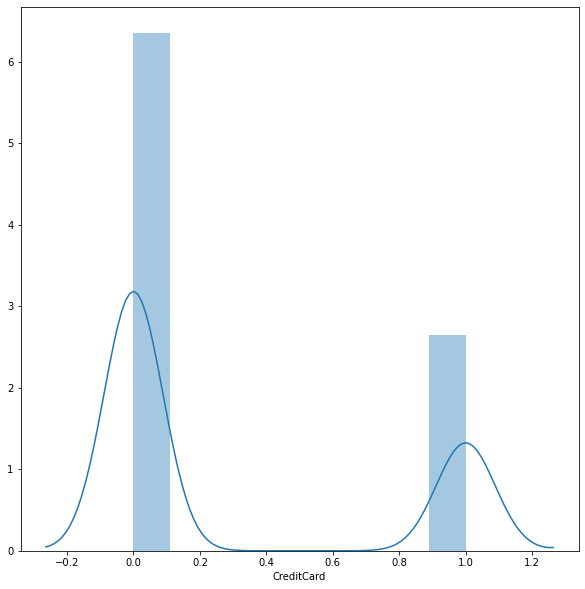

In [15]:
import seaborn as sns
for i in dfBankData.columns:
    plt.figure(figsize = (10,10))
    plt.xlabel =i
    sns.distplot(dfBankData[i])
    plt.show()

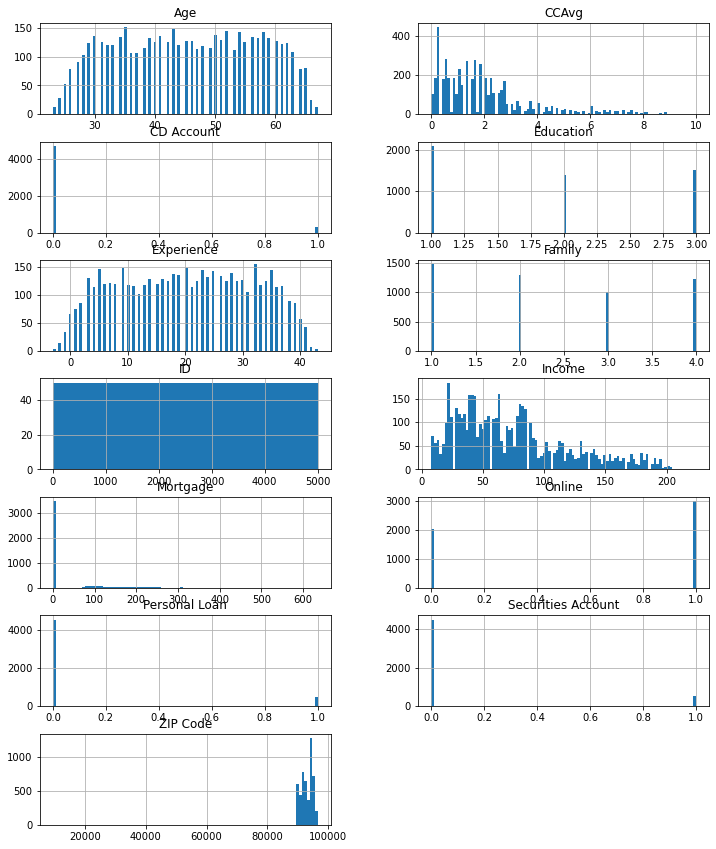

In [16]:
columns = list(dfBankData)[0:-1] # Excluding Outcome column which has only 
dfBankData[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

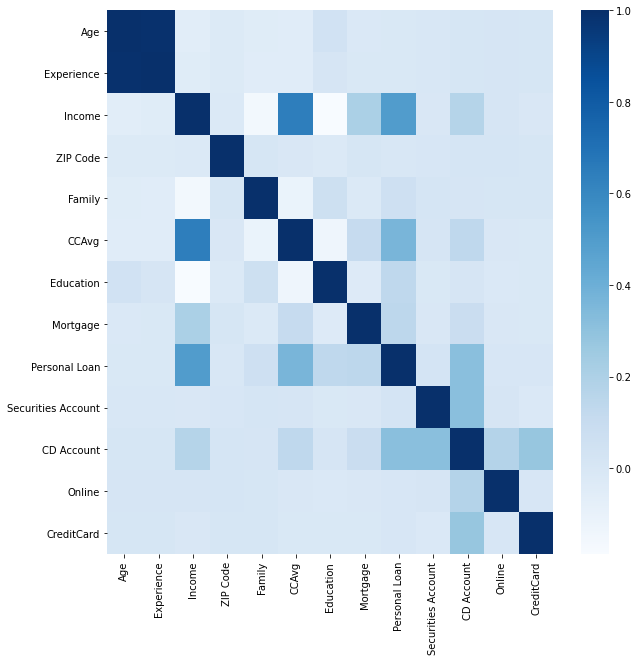

In [17]:
dfHeatMap = dfBankData.drop(columns='ID')
plt.figure(figsize=(10,10))
sns.heatmap( dfHeatMap.corr(),cmap="Blues")
plt.show()

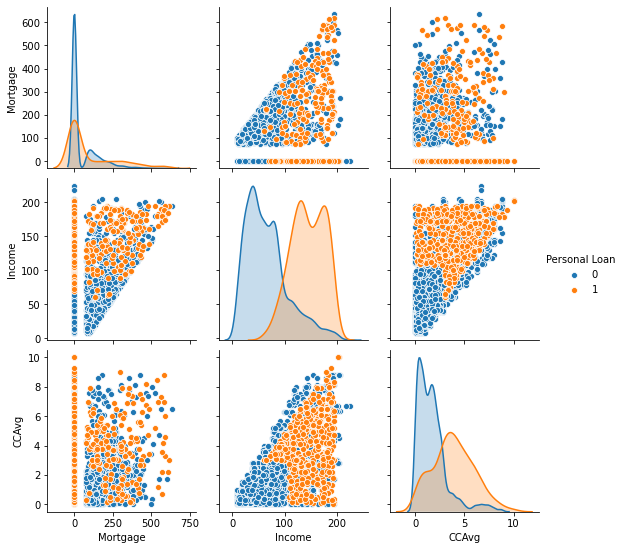

In [18]:
sns.pairplot(dfBankData[['Mortgage', 'Income', 'CCAvg', 'Personal Loan']], hue = 'Personal Loan', diag_kind = 'kde');

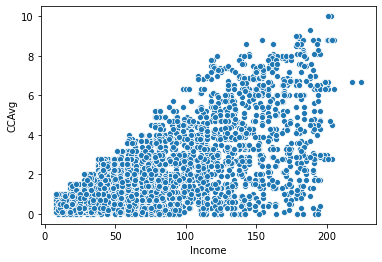

In [19]:
sns.scatterplot(x=dfBankData['Income'],y=dfBankData['CCAvg'])

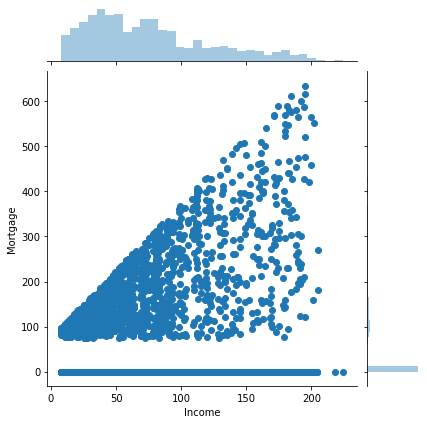

In [20]:
sns.jointplot(x=dfBankData['Income'],y=dfBankData['Mortgage'])

-Get data model ready

In [21]:
dfBankData[['Age','Experience','Income','Family','CCAvg']]==0 
# Since there are no 0 values, there is no need for imputation

,Age,Experience,Income,Family,CCAvg
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4995,False,False,False,False,False
4996,False,False,False,False,False
4997,False,False,False,False,False
4998,False,False,False,False,False


In [22]:
dfBankData[dfBankData['Experience']  <0]['Experience'].count()

52

Total 52 negative values in Experience

In [23]:
dfBankData['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
dfBankData['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
dfBankData['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

In [24]:
dfBankData['Experience'].isnull().sum()

52

52 Values of experience can be replaced with median value.

In [25]:
dfBankData['Experience'].fillna(dfBankData['Experience'].median(),inplace=True)

In [26]:
dfBankData[dfBankData['Experience']  <0]['Experience'].count()

0

In [27]:
dfBankData.groupby(['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.378982,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


#### Here you can see a strong correlation between personal loan with CCAvg and Income

In [28]:
pd.crosstab(dfBankData['CreditCard'],dfBankData['Personal Loan'],normalize='columns')

Personal Loan,0,1
CreditCard,,
0,0.706416,0.702083
1,0.293584,0.297917


In [29]:
pd.crosstab(dfBankData['Online'],dfBankData['Personal Loan'],normalize='columns')

Personal Loan,0,1
Online,,
0,0.404204,0.39375
1,0.595796,0.60625


In [30]:
pd.crosstab(dfBankData['CD Account'],dfBankData['Personal Loan'],normalize='columns')

Personal Loan,0,1
CD Account,,
0,0.964159,0.708333
1,0.035841,0.291667


In [70]:
pd.crosstab(dfBankData['Mortgage'],dfBankData['Personal Loan'],normalize='columns')

Personal Loan,0,1
Mortgage,,
0,0.696903,0.650000
75,0.001549,0.002083
76,0.002434,0.002083
77,0.000885,0.000000
78,0.003319,0.000000
...,...,...
590,0.000000,0.002083
601,0.000221,0.000000
612,0.000000,0.002083


### Get the Model Ready

#### Separate dependent and independent variables

In [31]:
X = dfBankData.drop("Personal Loan",axis=1)
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4.0,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39.0,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40.0,49,90034,3,0.5,2,0,0,0,1,0


In [32]:
Y = dfBankData['Personal Loan'].astype('category')
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: category
Categories (2, int64): [0, 1]

# 3. Split the data into test and train data set

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [77]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(dfBankData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(dfBankData.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# 4. User Logistic Regression To Predict Target Variable

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=7,solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(random_state=7, solver='liblinear')

In [35]:
y_predicted = lr.predict(X_test)
y_predicted.shape

(1500,)

In [36]:
y_predicted

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Try calculating Probabilities of Target using Sklearn

In [37]:
dfComp = pd.DataFrame()
dfComp['Actual'] = y_test.values
dfComp['Predicted'] = y_predicted
dfComp['Prob that o/p is 0'] = lr.predict_proba(X_test)[:,0]
dfComp['Prob that o/p is 1'] = lr.predict_proba(X_test)[:,1]
dfComp

,Actual,Predicted,Prob that o/p is 0,Prob that o/p is 1
0,0,0,0.990906,0.009094
1,1,0,0.674964,0.325036
2,0,0,0.816007,0.183993
3,0,0,0.980392,0.019608
4,0,0,0.992775,0.007225
...,...,...,...,...
1495,1,0,0.788873,0.211127
1496,0,0,0.991671,0.008329
1497,0,0,0.878711,0.121289
1498,0,0,0.985913,0.014087


## Build a confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
#from sklearn.feature_selection import RFE # Feature ranking with recursive feature elimination.
from sklearn import metrics #  includes score functions, performance metrics and pairwise metrics and distance computations
from sklearn.metrics import classification_report, confusion_matrix # Build a text report showing the main classification metrics,Compute confusion matrix to evaluate the accuracy of a classification. 
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score,accuracy_score

In [39]:
cm = confusion_matrix(dfComp['Actual'],dfComp['Predicted'])
cm

array([[1304,   39],
       [ 110,   47]], dtype=int64)

In [40]:
# Evaluate mode performance 
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1343
           1       0.55      0.30      0.39       157

    accuracy                           0.90      1500
   macro avg       0.73      0.64      0.67      1500
weighted avg       0.88      0.90      0.89      1500



In [55]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, annot=True, fmt ='.2f', xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel ="predicted"
    plt.show()

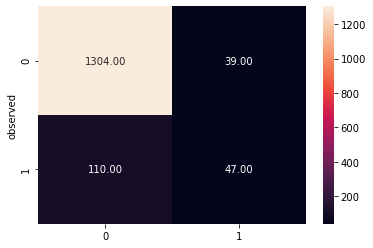

In [57]:
draw_cm(dfComp['Actual'],dfComp['Predicted'])

# 5.Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? 

In [43]:
# Get the Logistic regression paramaters
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
# Use GridSearchCV to improve the model  parameters
from sklearn.model_selection import GridSearchCV
param_grid = [{'solver': ['newton-cg','lbfgs','liblinear','sag','saga'], 'C': [0.001,0.01,0.1,0.25,0.5,0.75,1],
              'class_weight':['balanced'], 'penalty':['l2']}]
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5, verbose=0)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

LogisticRegression(C=0.25, class_weight='balanced', solver='liblinear')

In [61]:
#Changing to  C=0.25 , class_weight= balanced, solver will remain as liblinear
lrNew = LogisticRegression(C=0.25,random_state=7,solver='liblinear',class_weight='balanced')
lrNew.fit(X_train, y_train)

LogisticRegression(C=0.25, class_weight='balanced', random_state=7,
                   solver='liblinear')

In [62]:
cm = confusion_matrix(dfComp['Actual'],dfComp['Predicted'])
cm

array([[1304,   39],
       [ 110,   47]], dtype=int64)

In [63]:
cm = confusion_matrix(dfCompNew['Actual'],dfCompNew['Predicted'])
cm

array([[1193,  150],
       [  14,  143]], dtype=int64)

- Data Insight :: True Positive Increased from 47 to 143

In [46]:
y_predicted = lrNew.predict(X_test)
dfCompNew = pd.DataFrame()
dfCompNew['Actual'] = y_test.values
dfCompNew['Predicted'] = y_predicted
dfCompNew['Prob that o/p is 0'] = lrNew.predict_proba(X_test)[:,0]
dfCompNew['Prob that o/p is 1'] = lrNew.predict_proba(X_test)[:,1]
dfCompNew

,Actual,Predicted,Prob that o/p is 0,Prob that o/p is 1
0,0,0,0.994993,0.005007
1,1,1,0.132543,0.867457
2,0,0,0.705972,0.294028
3,0,0,0.996180,0.003820
4,0,0,0.985559,0.014441
...,...,...,...,...
1495,1,1,0.171388,0.828612
1496,0,0,0.934042,0.065958
1497,0,0,0.885085,0.114915
1498,0,0,0.896381,0.103619


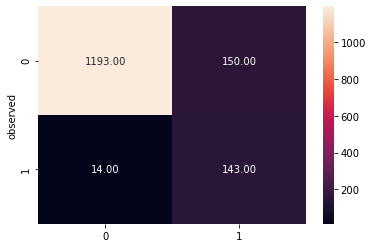

In [47]:
draw_cm(dfCompNew['Actual'],dfCompNew['Predicted'])

In [48]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1343
           1       0.49      0.91      0.64       157

    accuracy                           0.89      1500
   macro avg       0.74      0.90      0.79      1500
weighted avg       0.94      0.89      0.90      1500



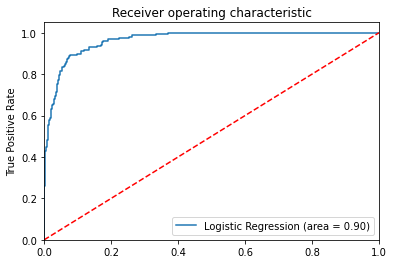

In [66]:
# Plotting ROC Curve.

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lrNew.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lrNew.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel ="False Positive Rate"
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [69]:
print("Recall:",recall_score(y_test,y_predicted))
print()
print("Precision:",precision_score(y_test,y_predicted))
print()
print("F1 Score:",f1_score(y_test,y_predicted))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predicted))

Recall: 0.910828025477707

Precision: 0.4880546075085324

F1 Score: 0.6355555555555555

Roc Auc Score: 0.8995688898795832


In [50]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(lrNew.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
10,CD Account,2.72
7,Education,1.16
12,CreditCard,0.80
9,Securities Account,0.59
5,Family,0.52
11,Online,0.52
6,CCAvg,0.21
1,Age,0.05
2,Experience,0.05
3,Income,0.05


## Business Insights

#### Data Insights
- A string correlation exists between Presonal Loan ,CCAvg and Income
- 3462 people did not have mortgage account with Thera Bank
- From the feature importance table Mortage, ZIP Code, ID has 0 coefficient, so it does not have impact on target variable.

#### Model Performance 
- Fine tuning the model improved the over all accuracy

#### Business Insights

- True Positive (observed=1,predicted=1): Model predicted that 143 customers shall take Personal loan and they customer took it
- False Positive (observed=0,predicted=1): Model Predicted 150 Personal loan will take and the customer did not take it but bank didn't loose any money
- True Negative (observed=0,predicted=0): Model Predicted 1193 Personal loan will not take and the customer did not take it
- False Negative (observed=1,predicted=0): Model Predicted 14 Personal loan will not take and the customer took it - Model needs an improvement here.

- Since the bank need more personal loan customer and bank does not want to lose customer, focus should be on "Recall"
- The intial model predicted 110 people will not take loan, but ended up taking. Fine tuning the model did help from bringing False Positive from 110 to 14. 

